<a href="https://colab.research.google.com/github/zahra370/DL_assignments/blob/main/CNN_Final_A5_with_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

# Display the version
print(tf.__version__)	

# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

2.9.2


In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
X_train = x_train[:40000]
X_val = x_train[40000:]

Y_train = y_train[:40000]
Y_val = y_train[40000:]

X_test = x_test
Y_test = y_test

# shape of the train validation and test dataset

print('shape of train images',X_train.shape)
print('shape of train label',Y_train.shape)

print('shape of validation images',X_val.shape)
print('shape of validation label',Y_val.shape)

print('shape of test images',X_test.shape)
print('shape of test label',Y_test.shape)

shape of train images (40000, 32, 32, 3)
shape of train label (40000, 1)
shape of validation images (10000, 32, 32, 3)
shape of validation label (10000, 1)
shape of test images (10000, 32, 32, 3)
shape of test label (10000, 1)


In [5]:
#  Data Preprocessing steps

# Reduce pixel values
X_train, X_val, X_test = X_train / 255.0,X_val / 255.0, X_test / 255.0
 
# flatten the label values
Y_train, Y_val, Y_test = Y_train.flatten(),Y_val.flatten(), Y_test.flatten()

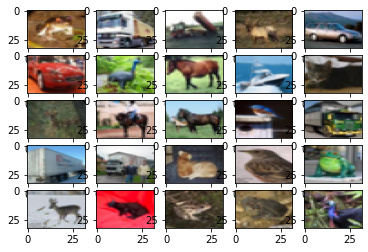

In [6]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0
 
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
 
plt.show()

ELU is selected based on the heighest Accuracy and lowest loss, table is given in the report.


In [22]:
from keras.layers import LeakyReLU
from keras.initializers import Constant
from keras.layers import PReLU
from keras.layers import ELU


# number of classes
K = len(set(Y_train))
 
# calculate total number of classes
# for output layer
print("number of classes:", K)
 
# Build the model using the functional API
# input layer

# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), activation='elu', padding='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), activation='elu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)
 
x = Conv2D(128, (3, 3), activation='elu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)
 
x = Flatten()(x)
x = Dropout(0.2)(x)
 
# Hidden layer
x = Dense(1024, activation='elu')(x)
x = Dropout(0.2)(x)

# Second Hidden layer
x = Dense(256, activation='elu')(x)
x = Dropout(0.2)(x)
 

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)
 
model = Model(i, x)
 
# model description
model.summary()

number of classes: 10
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 1

Default value of Learning rate = 0.001 is used

In [23]:
# Compile
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])

# Fit
r = model.fit(
X_train, Y_train ,validation_data=(X_val, Y_val), epochs=50)

Epoch 1/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.7064 - accuracy: 0.4103 - val_loss: 1.1674 - val_accuracy: 0.5785
Epoch 2/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2246 - accuracy: 0.5701 - val_loss: 1.0075 - val_accuracy: 0.6423
Epoch 3/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.0238 - accuracy: 0.6454 - val_loss: 1.0160 - val_accuracy: 0.6390
Epoch 4/50
1250/1250 [==============================] - 7s 5ms/step - loss: 0.9143 - accuracy: 0.6825 - val_loss: 0.9850 - val_accuracy: 0.6607
Epoch 5/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8352 - accuracy: 0.7089 - val_loss: 0.8427 - val_accuracy: 0.7138
Epoch 6/50
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7658 - accuracy: 0.7351 - val_loss: 1.0467 - val_accuracy: 0.6371
Epoch 7/50
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6990 - accuracy: 0.7581 - val_loss: 0.7868 - val_accuracy:

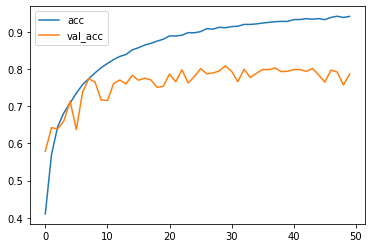

In [24]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

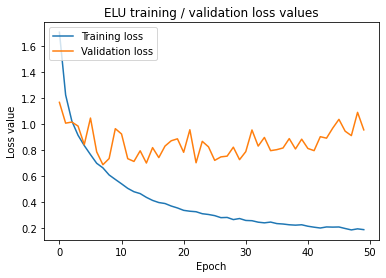

In [25]:
plt.plot(r.history['loss'], label='Training loss')
plt.plot(r.history['val_loss'], label='Validation loss')
plt.title('ELU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(X_train, Y_train, batch_size)
# steps_per_epoch = x_train.shape[0] / batch_size

r = model.fit(train_generator, validation_data=(X_test, Y_test),
			steps_per_epoch= 500, epochs=50)


Epoch 1/50
500/500 [==============================] - 12s 22ms/step - loss: 0.7555 - accuracy: 0.7779 - val_loss: 0.6396 - val_accuracy: 0.8030
Epoch 2/50
500/500 [==============================] - 11s 22ms/step - loss: 0.6089 - accuracy: 0.8093 - val_loss: 0.6086 - val_accuracy: 0.8125
Epoch 3/50
500/500 [==============================] - 11s 21ms/step - loss: 0.5590 - accuracy: 0.8272 - val_loss: 0.6164 - val_accuracy: 0.8155
Epoch 4/50
500/500 [==============================] - 11s 21ms/step - loss: 0.5394 - accuracy: 0.8320 - val_loss: 0.5745 - val_accuracy: 0.8226
Epoch 5/50
500/500 [==============================] - 11s 22ms/step - loss: 0.5313 - accuracy: 0.8354 - val_loss: 0.6676 - val_accuracy: 0.8035
Epoch 6/50
500/500 [==============================] - 11s 22ms/step - loss: 0.5096 - accuracy: 0.8407 - val_loss: 0.5601 - val_accuracy: 0.8267
Epoch 7/50
500/500 [==============================] - 11s 22ms/step - loss: 0.4900 - accuracy: 0.8431 - val_loss: 0.5615 - val_accuracy:

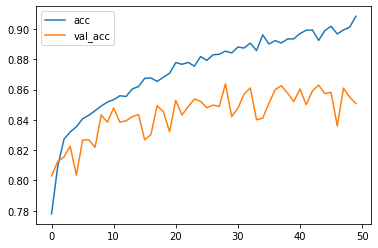

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# predictions
from sklearn.metrics import confusion_matrix , classification_report

Y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in Y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

313/313 [==============================] - 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      1000
           1       0.96      0.93      0.94      1000
           2       0.70      0.89      0.78      1000
           3       0.78      0.66      0.71      1000
           4       0.86      0.82      0.84      1000
           5       0.87      0.70      0.78      1000
           6       0.73      0.96      0.83      1000
           7       0.95      0.84      0.90      1000
           8       0.95      0.91      0.93      1000
           9       0.91      0.93      0.92      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



1/1 [==============================] - 0s 131ms/step
Original label is airplane and predicted label is airplane


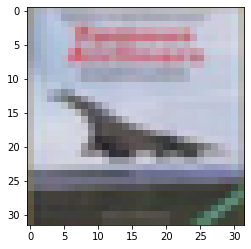

In [ ]:
# label mapping

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 3

# display the image
plt.imshow(X_test[image_number])

# load the image in an array
n = np.array(X_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[Y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))

In [ ]:
# save the model
model.save('CNN_zahra.h5')